## Content of the project
1. [Introduction](#intro)
2. [Step 1. Open the data file and study the general information](#step1)
 - [Conclusion](#con1)
3. [Step 2. Preprocessing data](#step2)
 - [Replacing the column names (making them lowercase).](#low)
 - [Work with missing values.](#missing)
 - [Converting the data to the required types.](#dtypes)
 - [Creating the new column for the total sales (the sum of sales in all regions) for each game.](#total)
 - [Conclusion](#con2)
4. [Step 3. Analysing data](#step3)
 - [How many games were released in different years? Is the data for every period significant?](#games)
 - [The platforms with the greatest total sales. Building distributions based on data for each year.](#platforms)
 - [Determining what period we should take data for to build a prognosis for 2017.](#period)
 - [Which platforms are leading in sales? Which ones are growing or shrinking?](#lead)
 - [Building of box plots for the global sales of all games, broken down by platform.](#boxplot)
 - [How user and professional reviews affect sales for one popular platform? Creating of scatter plots and calculating the correlation between reviews and sales.](#correlation)
 - [Compare the sales of the same games on other platforms.](#sales)
 - [The general distribution of games by genre.](#distribution)
 - [Conclusion](#con3)
5. [Step 4. Creating a user profile for each region](#step4)
 - [The top five platforms of each region.](#top5_plat)
 - [The top five genres in each region.](#top5_genre)
 - [Do ESRB ratings affect sales in individual regions?](#esrb)
 - [Conclusion](#con4)
6. [Step 5. Testing the hypotheses](#step5)
 - [Average user ratings of the Xbox One and PC platforms are the same.](#hyp1)
 - [Average user ratings for the Action and Sports genres are different.](#hyp2)
 - [Conclusion](#con5)
7. [Overall Conclusion](#overall) 

### Inroduction <a name="intro"></a>

We on project for the online store Ice, which sells video games all over the world. We have all information about user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will you to spot potential big winners and plan advertising campaigns.

We have data from 2016. Let’s imagine that it’s December 2016 and we’re planning a campaign for 2017.

### Step 1. Open the data file and study the general information <a name="step1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
games = pd.read_csv('/datasets/games.csv')

In [2]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Conclusion** <a name="con1"></a>

From info() method we see that in our data we have 16715 rows and columns. Also we can see that we have to change the data types in some of columns and determine what we'll to do with a lot of missing values.

### Step 2. Prepare the data <a name="step2"></a>

- **Replacing the column names (making them lowercase).** <a name="low"></a>

In [5]:
games.columns = games.columns.str.lower()

In [6]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


With function, str.lower() we can tidy up the names of columns for easy work with them.

- **Work with missing values** <a name="missing"></a>

In [7]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
100 * games.isnull().sum() / len(games)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

From isnull() method we determined that in columns: name, year_of_release and genre there are not a lot of missing values that we can drop out from our data. To do so we use dropna(subset="columns", inplace=True).

In [9]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
games[games['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [11]:
games[games['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


In [12]:
games[games['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN


In [13]:
games[games['name'] == 'PDC World Championship Darts 2008']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6917,PDC World Championship Darts 2008,Wii,2008.0,Sports,0.02,0.21,0.0,0.01,51.0,5.4,E10+
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+


In [14]:
games.dropna(subset=['name', 'year_of_release'], inplace=True)

In [15]:
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

But we still have missing values in 3 columns: critic_score, user_score and rating. The percentage of them is very hight. So we can assume, that for some games or platforms there are not any information. May be because some games or platform those are very old and don't used anymore to critisize them and give them rating. 

In [16]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
9.6       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [17]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.3      2
1.1      2
0.7      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

One more thing we have to replace the 'tbd' value in 'user_score' column, because we don't know what does it mean. If we worked with a team, we could clarify what this value means. But in this we just replace 'tbd' with NaN.

- **Converting the data to the required types.** <a name="dtypes"></a>

In [18]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

From dtypes we see, that the 'year_of_release' is floating type and 'user_score' is object. This astype() method we'll correct it.

In [19]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [20]:
games['user_score'] = games['user_score'].astype('float')

In [21]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

For now all data types are correct and we can begin to work with it and also calculate the total sales.

- **Creating the new column for the total sales (the sum of sales in all regions) for each game.** <a name="total"></a>

To create new column with total sales of all region we'll just sum all columns with sales values.

In [22]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [23]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Conclusion** <a name="con2"></a>

Now our data looks more orderly and ready to work with it. We got rid of missing values in columns with names, genres and year of release of games. Next we replaced 'tbd' values with NaN and formatted the years and user scores to the required data types. And we created new column of total sales for our DataFrame.

### Step 3. Analysing data <a name="step3"></a>

- **How many games were released in different years? Is the data for every period significant?** <a name="games"></a>

In [24]:
games.groupby('year_of_release')['name'].count().sort_values()

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      60
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

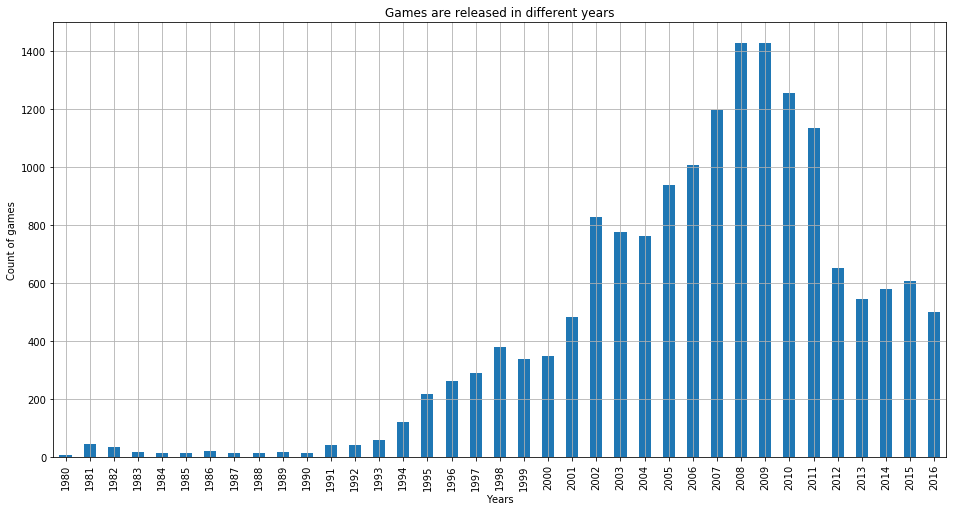

In [25]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(16,8))
plt.title('Games are released in different years')
plt.xlabel('Years')
plt.ylabel('Count of games')
plt.show()

To know how many games were released we grouped games by year. from the graf we see that more released games were in 2008 and 2009. In 1980 were released just 9 games, but this is surprising, because then the computer was only created. In the last years (2013-2016) were sold around 550 games in year.

- **The platforms with the greatest total sales. Building distributions based on data for each year.** <a name="platforms"></a>

In [26]:
year_grouped = games.groupby(['year_of_release', 'platform'])['total_sales'].sum()
year_grouped

year_of_release  platform
1980             2600        11.38
1981             2600        35.68
1982             2600        28.88
1983             2600         5.84
                 NES         10.96
                             ...  
2016             PSV          4.25
                 Wii          0.18
                 WiiU         4.60
                 X360         1.52
                 XOne        26.15
Name: total_sales, Length: 238, dtype: float64

To look at how sales varied from platform to platform we grouped data by year and platform accordig to total sales. 

In [27]:
year_grouped = year_grouped.unstack(1)
year_grouped

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The method unstack(1) (where 1 is parameter of platform column) helps us to make a pivot table grouped by year and see the total sales of each platform.

In [28]:
year_grouped.sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

As we can see from sorting total sales of each platform in descending order the greatest total sales has PS2 (1233.56) and the lowest has PCFX platform. 

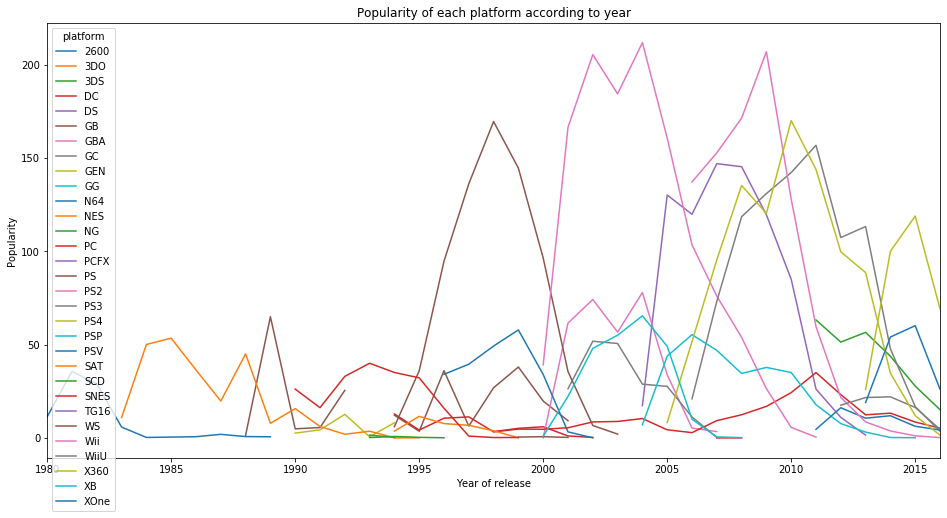

In [29]:
year_grouped.plot(figsize=(16, 8))
plt.title('Popularity of each platform according to year')
plt.xlabel('Year of release')
plt.ylabel('Popularity')
plt.show()

We builded a distribution based on data for each year by using plot() method. From this graph it's difficult to see which platform was more popular, then we have to buil another graph with top platforms.

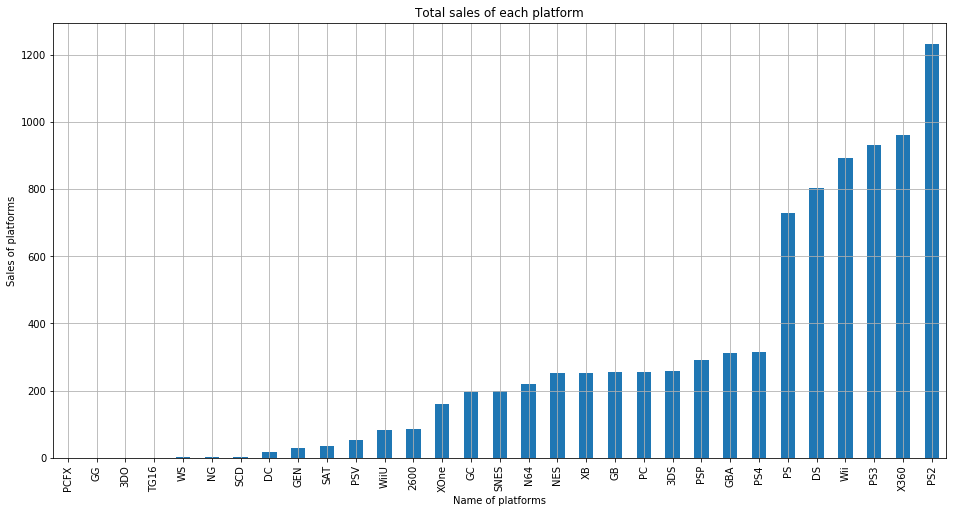

In [30]:
year_grouped.sum().sort_values().plot(kind='bar', grid=True, figsize=(16,8))
plt.title('Total sales of each platform')
plt.xlabel('Name of platforms')
plt.ylabel('Sales of platforms')
plt.show()

In [31]:
top_6 = year_grouped.sum().sort_values(ascending=False).index[:6]
top_6

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

From previous bar graph we can select top 6 platforms ('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'). We have saved them in new top_6 variable. We summed our total sales for each platform and sorted it in descending order and choosed 6 platforms by help index[] parameter. Let's look now how it's look on the graph. 

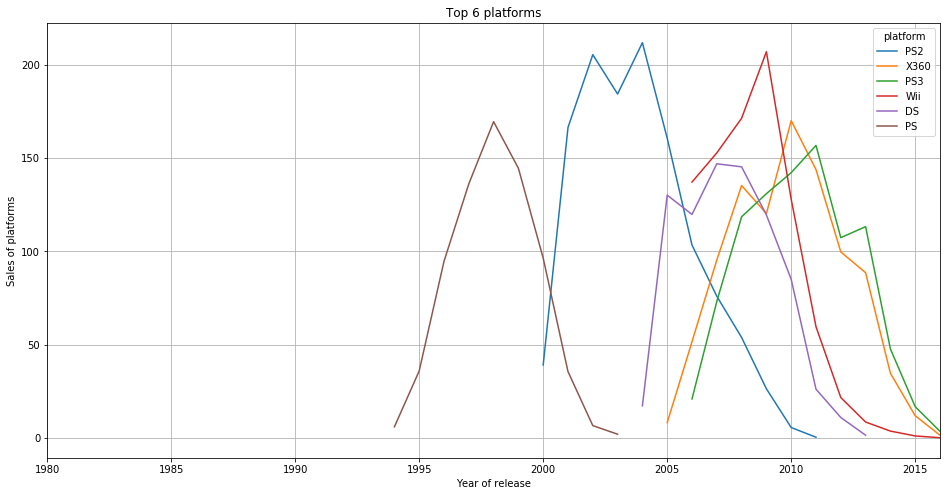

In [32]:
year_grouped[top_6].plot(grid=True, figsize=(16,8))
plt.title('Top 6 platforms')
plt.xlabel('Year of release')
plt.ylabel('Sales of platforms')
plt.show()

Now our graph looks more clearly. The first top 6 platform PS was released in 1994, the second PS2 in 2000, DS is in 2004, Xbox 360 in 2005, Wii and PS3 in 2006.

In [33]:
(~year_grouped.isnull()).sum()

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
dtype: int64

To know how long does it generally take for new platforms to appear and old ones to fade, we have to inidicate when each platform was active (when it doesn't have any NaN values). To do so we used isnull().sum() method and inigate those values. 

In [34]:
(~year_grouped[top_6].isnull()).sum()

platform
PS2     12
X360    12
PS3     11
Wii     11
DS      11
PS      10
dtype: int64

We see that our top 6 platforms were active around 11 years each self.

- **Determining what period we should take data for to build a prognosis for 2017.** <a name="period"></a>

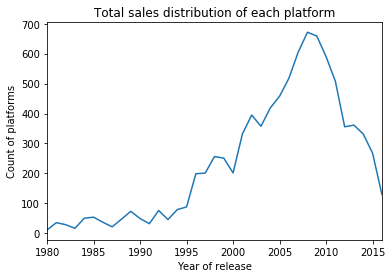

In [35]:
year_grouped.sum(axis=1).plot()
plt.title('Total sales distribution of each platform')
plt.xlabel('Year of release')
plt.ylabel('Count of platforms')
plt.show()

- *Work only with the data that you've decided is relevant. Disregard the data for previous years.*

In [36]:
games = games[games['year_of_release'] >= 2013]

From the graph we can assume that relevant year for analysis is from 2013. To analyse the data of 3 years will be enought for planning a campaign for 2017.

In [37]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


- **Which platforms are leading in sales? Which ones are growing or shrinking?** <a name="lead"></a>

In [38]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

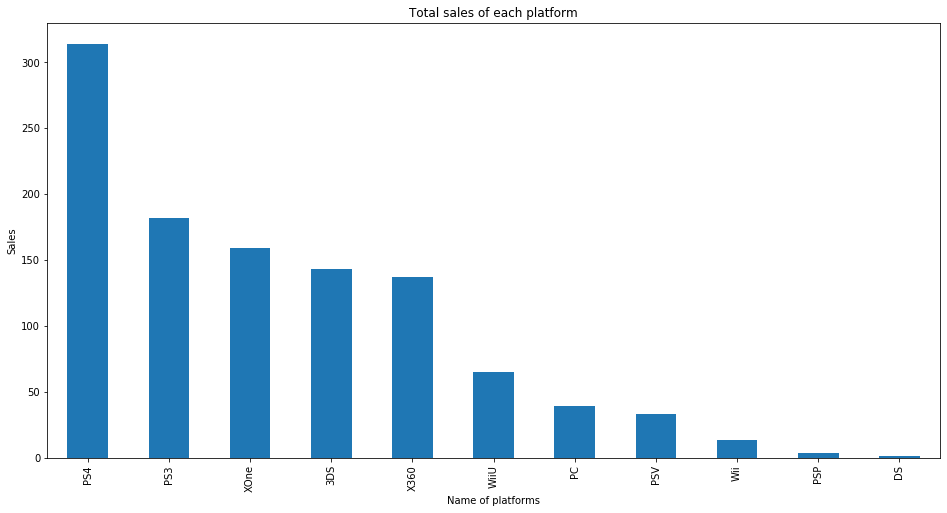

In [39]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind="bar", figsize=(16,8))
plt.title('Total sales of each platform')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

In order to know which platform are leading in sales we grouped updated data (from year 2013) by platform for total sales and also summed and sorted values. The PS4 platform is leading by sales next leaders are PS3, XBox One, 3DS and XBox 360. And the lowes total sales on DC and PSP platforms. 

In [40]:
def color_positive_green(val):
    if val > 0:
        color = 'green'
    else:
        color = 'red'
    return 'color: %s' % color

In [41]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


We created two new functions to make our huge year_grouped table more clear and light for reading. For max values we choosed yellow backround, for NaN values beige backround. For positive values it'll be green color of numbers and for negative red. We've used def() function and condition if .. else .. To add those functions to our table we'll use apply() and applymap() methods. 

In [42]:
year_grouped.style.\
    apply(highlight_max).\
    highlight_null(null_color='beige')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1981,35.68,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1982,28.88,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1983,5.84,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.96,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1984,0.27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,50.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1985,0.45,nan,nan,nan,0.02,nan,nan,nan,nan,nan,nan,53.44,nan,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1986,0.67,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,36.41,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1987,1.94,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,19.76,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1988,0.74,nan,nan,nan,nan,1.43,nan,nan,nan,nan,nan,45.01,nan,0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [43]:
year_grouped.diff(axis=0).style.\
    applymap(color_positive_green).\
    apply(highlight_max).\
    highlight_null(null_color='beige')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1981,24.3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1982,-6.8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1983,-23.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1984,-5.57,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,39.12,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1985,0.18,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.36,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1986,0.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-17.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1987,1.27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-16.65,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1988,-1.2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,25.25,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


We have to determine whether the data growing or shrinking. In order to do this we look on the data, but it gives us not so much and it's difficult to calculate separately. So we used diff() method which calculate the difference between each row. We make the analysis for 2017 and we can see all sales in 2016 are shrinking. Where there are NaN values means that these platforms are not for sales anymore. We can see that all values in 2016 are negative (red color), but in 2013, 2014 and 2015 we see some positive values. It means that it were sales in those years.

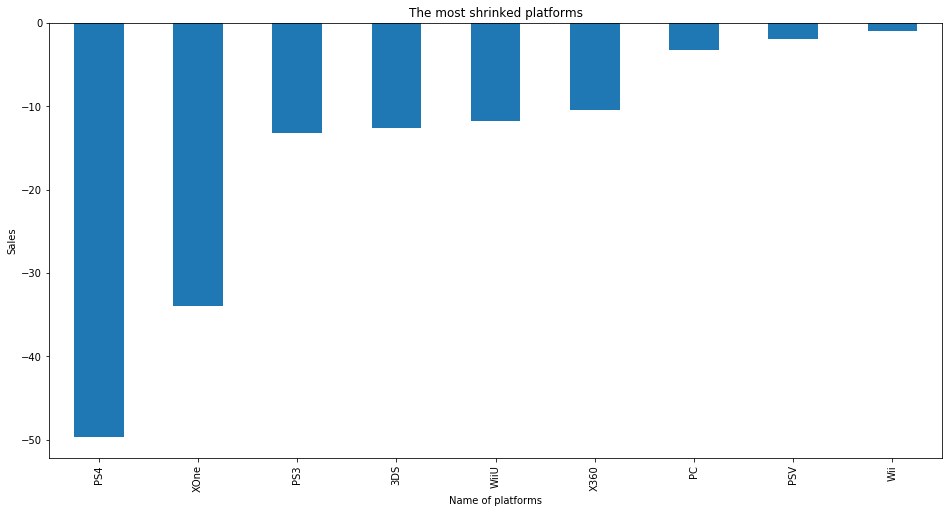

In [44]:
year_grouped.diff(axis=0).loc[2016].dropna().sort_values().plot(kind="bar", figsize=(16,8))
plt.title('The most shrinked platforms')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

Without NaN values (we used dropna() method) The most shrinked platform is PS4. But we see that in 2014 and 2015 years it was the most sold platform.

- **Building of box plots for the global sales of all games, broken down by platform.** <a name="boxplot"></a>

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


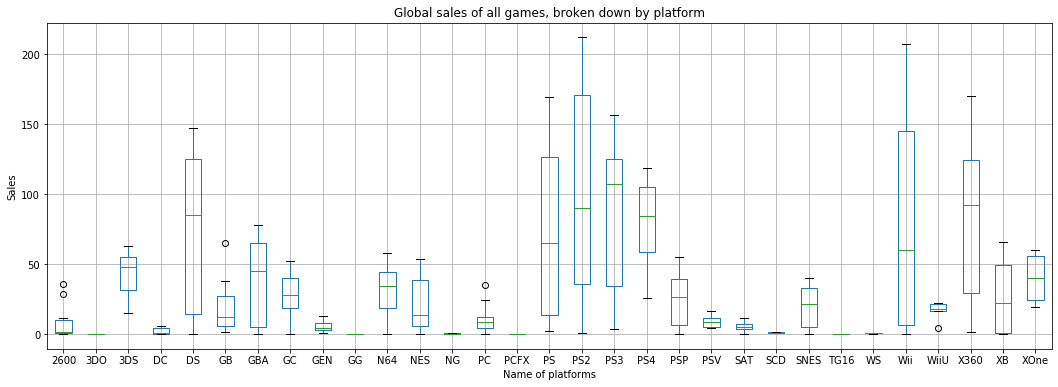

In [45]:
year_grouped.boxplot(figsize=(18,6))
plt.title('Global sales of all games, broken down by platform')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

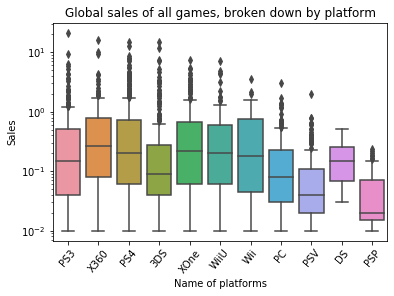

In [46]:
sns.boxplot(x='platform', y='total_sales', data=games, width=0.8)
plt.yscale('log')
plt.xticks(rotation=50)
plt.title('Global sales of all games, broken down by platform')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

From the boxplot we can conclude that the difference in sales of various platforms is significant. For example total sales for DC and WS are very low compared with PS2 or PS4. Also we can see that all series PS platforms had succses on the markt. We see that total sales for PS, DS and XB looks quite similar. The most sold platform is PS2 and Wii.

- **How user and professional reviews affect sales for one popular platform? Creating of scatter plots and calculating the correlation between reviews and sales.** <a name="correlation"></a>

In [47]:
games.groupby('platform')['total_sales'].sum().sort_values()

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: total_sales, dtype: float64

In [48]:
pop_plat = games[games['platform'] == 'PS4']
pop_plat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


We have choosed the PS4 platform as the most popular, because in the last years it was the most sold platform (314.14). Another way it's also possible to choose the PS2. This platform was also very popular but in 2005 years and we choose the range from 2013. So, it's better to work with some new popular platform. 

In [49]:
pop_plat.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


To calculate correlation between all values we call the method corr().

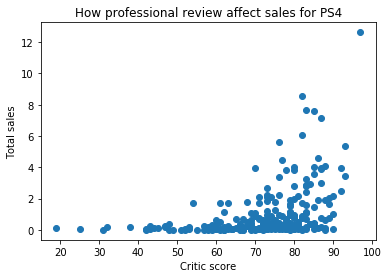

In [50]:
plt.scatter(pop_plat['critic_score'], pop_plat['total_sales'])
#pop_plat.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,5))
plt.title('How professional review affect sales for PS4')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

In [51]:
pop_plat['total_sales'].corr(pop_plat['critic_score'])

0.406567902061781

From scatter plot we can assume that there here is a quit linear correlation between total sales and critic score. But from Pearson correlation coefficient we can conclude that there is a positive correlation. Our conclusion is that total sales of the games depends on their critical score.

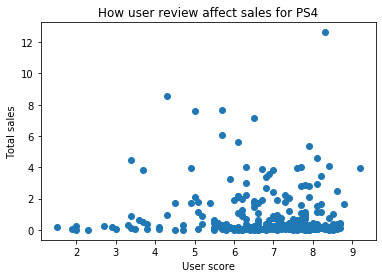

In [52]:
plt.scatter(pop_plat['user_score'], pop_plat['total_sales'])
#pop_plat.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,5))
plt.title('How user review affect sales for PS4')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

In [53]:
pop_plat['total_sales'].corr(pop_plat['user_score'])

-0.031957110204556424

At this scatter plot we don't see any linear correlation. The values are scatterd on the graph. Also from corr() method we conclude that it's negative correlation, but not so hight negative, it's close to zero.

- **Compare the sales of the same games on other platforms.** <a name="sales"></a>

In [54]:
games_of_platforms = games.groupby('name').filter(lambda x: x['platform'].count() >= 2)
games_of_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


To compare the sales of the same games we have to group the data by game and clarify that it must to be observed more than 2 platforms for each game. To do so we used lambda function and filter() method.

In [55]:
games_of_platforms = games.groupby('name').filter(lambda x: (x['platform'] == "Wii").sum() == 1)
games_of_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16300,Barbie and Her Sisters Puppy Rescue,WiiU,2015,Action,0.00,0.01,0.00,0.00,NaN,2.8,E,0.01
16312,Monster High: New Ghoul in School,Wii,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01


Also we are intrested to compare the sales of the games those are suitable for PS4 too.

In [56]:
games_of_platforms.groupby(['name', 'platform']).count()

year_of_release  genre  na_sales  \
name                       platform                                     
Angry Birds Star Wars      3DS                     1      1         1   
                           PS3                     1      1         1   
                           PS4                     1      1         1   
                           PSV                     1      1         1   
                           Wii                     1      1         1   
...                                              ...    ...       ...   
Young Justice: Legacy      PS3                     1      1         1   
                           Wii                     1      1         1   
                           X360                    1      1         1   
Zumba Fitness: World Party Wii                     1      1         1   
                           XOne                    1      1         1   

                                     eu_sales  jp_sales  other_sales  \
name                       platform                                    
Angry Birds Star Wars      3DS              1         1            1   
                           PS3              1         1            1   
                           PS4              1         1            1   
                           PSV              1         1            1   
                           Wii              1         1            1   
...                                       ...       ...          ...   
Young Justice: Legacy      PS3              1         1            1   
                           Wii              1         1            1   
                           X360             1         1            1   
Zumba Fitness: World Party Wii              1         1            1   
                           XOne             1         1            1   

                                     critic_score  user_score  rating  \
name                       platform                                     
Angry Birds Star Wars      3DS                  0           1       1   
                           PS3                  1           1       1   
                           PS4                  1           1       1   
                           PSV                  0           1       1   
                           Wii                  0           1       1   
...                                           ...         ...     ...   
Young Justice: Legacy      PS3                  0           1       1   
                           Wii                  0           0       1   
                           X360                 0           1       1   
Zumba Fitness: World Party Wii                  0           0       1   
                           XOne                 1           1       1   

                                     total_sales  
name                       platform               
Angry Birds Star Wars      3DS                 1  
                           PS3                 1  
                           PS4                 1  
                           PSV                 1  
                           Wii                 1  
...                                          ...  
Young Justice: Legacy      PS3                 1  
                           Wii                 1  
                           X360                1  
Zumba Fitness: World Party Wii                 1  
                           XOne                1  

[120 rows x 10 columns]

We have received the games that are available on different platforms including PS4.

In [57]:
games_of_platforms = games_of_platforms.reset_index()
games_of_platforms

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
1,143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
2,264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
3,271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
4,359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
116,16300,Barbie and Her Sisters Puppy Rescue,WiiU,2015,Action,0.00,0.01,0.00,0.00,NaN,2.8,E,0.01
117,16312,Monster High: New Ghoul in School,Wii,2015,Action,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
118,16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01


We have reset the indexix to look at the date more precise. 

In [58]:
games_of_platforms.groupby('platform')['total_sales'].sum().sort_values()

platform
PSP      0.19
DS       0.50
PC       0.69
PSV      1.10
3DS      2.58
WiiU     4.92
XOne     6.00
PS4     11.63
Wii     13.66
X360    13.76
PS3     15.27
Name: total_sales, dtype: float64

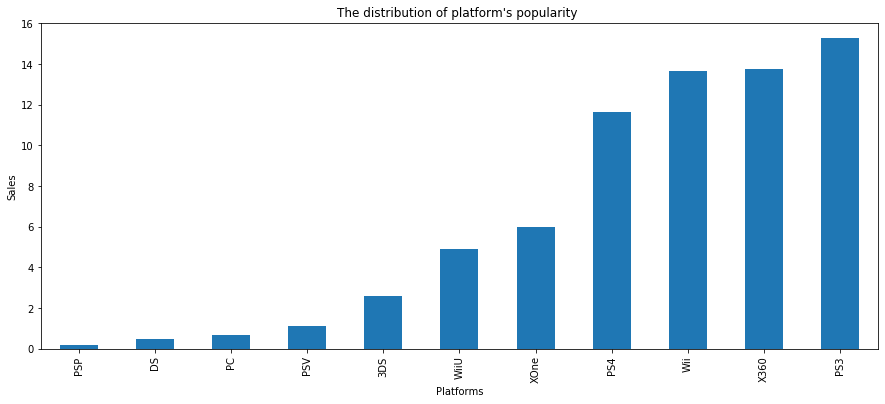

In [59]:
games_of_platforms.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', figsize=(15,6))
plt.title("The distribution of platform's popularity ")
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

From this graph we can see that it was sold a lot of games for PS3, XBox One and XBox 360 platforms, but not so much as for PS4.

In [60]:
games_of_platforms.groupby(['name', 'platform'])['total_sales'].sum().sort_values().tail(20)

name                   platform
Skylanders: Trap Team  X360        0.89
                       Wii         0.95
Just Dance 2016        Wii         0.95
Disney Infinity        PS3         0.97
Just Dance 2014        X360        0.99
Skylanders SWAP Force  PS3         1.02
FIFA 14                XOne        1.16
Skylanders SWAP Force  X360        1.32
Disney Infinity        X360        1.44
                       Wii         1.60
Just Dance 2015        Wii         2.01
Skylanders SWAP Force  Wii         2.15
FIFA 15                XOne        2.18
                       X360        2.92
FIFA 14                PS4         3.01
Just Dance 2014        Wii         3.58
FIFA 14                X360        4.22
FIFA 15                PS3         4.28
                       PS4         6.08
FIFA 14                PS3         6.46
Name: total_sales, dtype: float64

From sorting the games by total sales we can conclude that the game "FIFA 14" and "FIFA 15" are very popular on different platforms like PS3, XBox 360 and PS4. The next solded games are "Just Dance" on Wii. And also game "Skylanders SWAP Force" have popularity on Wii, XBox 360 and PS3 platforms.

- **The general distribution of games by genre.** <a name="distribution"></a>

In [61]:
games.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            3.17
Strategy         10.08
Simulation       21.76
Adventure        23.64
Fighting         35.31
Racing           39.89
Platform         42.63
Misc             62.82
Role-Playing    145.89
Sports          150.65
Shooter         232.98
Action          321.87
Name: total_sales, dtype: float64

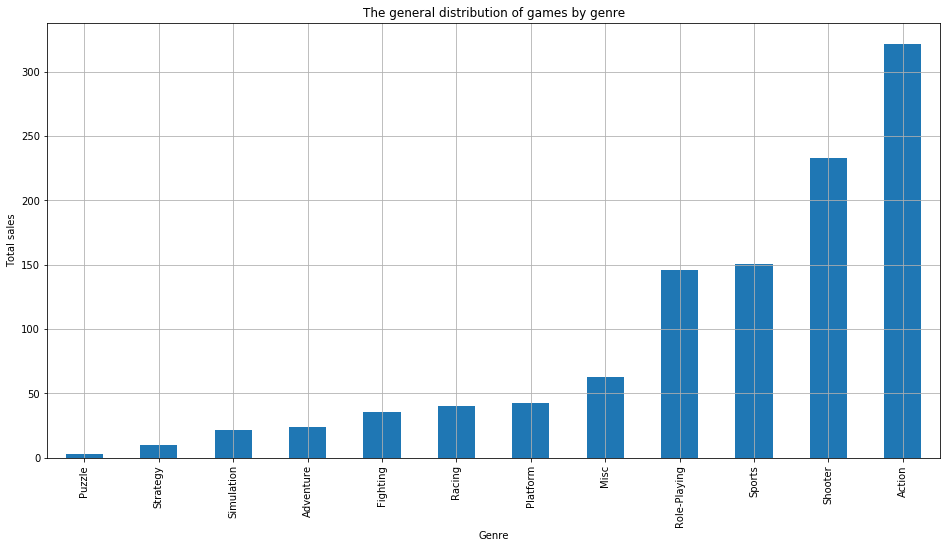

In [62]:
games.groupby('genre')['total_sales'].sum().sort_values().plot(kind='bar', grid=True, figsize=(16,8))
plt.title('The general distribution of games by genre')
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.show()

From this graph we see the distribution of games by genre. There are a lot of kinds of genres. The most prifitable genre is Action than Sports and Shooter. The unpopular genres are Puzzle and Strategy. We can generalize that not a lot of players like Strategy, Puzzle and Adventure. May be those genres suit just for children or for popularity that don't intrested in hard games. But a lot of gamers like Action, Sports and Shooter, because it's intresting genres of the games.

**Conclusion** <a name="con3"></a>

It was very big part of our project. We have determind that in 2008 and 2009 years were released the most count of the games. In year_grouped variable we saved the distribution of the platforms based on data for each year. Thus we determinded the most popular platform PS2 for all period that we have. Then we found the top 6 platforms and saved them top_6 variable and determined that they were popular around 11 years each. 

For our further analysis we took the data from 2013 so the data allows us to made more precise analisys for 2017. The PS4 was the leader on the sales, next leaders were PS3, XBox One, 3DS and XBox 360. For determining where the sales of platforms are growing or shrinking we used the diff() method to calculate the difference platform's sales between each year. The platform PS4 sales were growing in 2014 and 2015 and then shrinking. Another sales of games in all platforms shrinked to 2016. 

We ploted boxplots and saw that the differences in sales of each platform are significant. Also we called corr() function and concluded that there is a positive correlation between critic score and total sales and the correlation of user score and total sales negative but near to zero. 

We have compired the sales of the games in different platforms (including PS4). The game "FIFA 14" and "FIFA 15" are very popular on different platforms like PS3, XBox 360 and PS4. The next solded games are "Just Dance" on Wii. And also game "Skylanders SWAP Force" have popularity on Wii, XBox 360 and PS3 platforms.

At the and we observed the most profitable genres and determined that there are Action, Sports and Shooter.

### Step 4. Create a user profile for each region <a name="step4"></a>

- **The top five platforms of each region.** <a name="top5_plat"></a>

In [63]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [64]:
top5_na_plat = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_na_plat

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

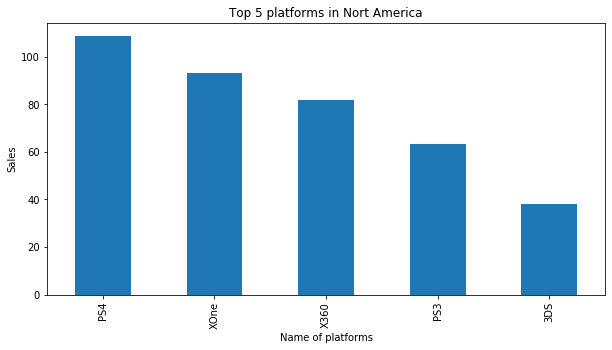

In [65]:
top5_na_plat.plot(kind="bar", figsize=(10,5))
plt.title('Top 5 platforms in Nort America')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

In top5_na_plat variable we saved top 5 platforms in North America. Thre are PS4, XBox One, XBox 360, PS3, and 3DS. We used the method groupby and iloc[].

In [66]:
top5_eu_plat = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_eu_plat

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

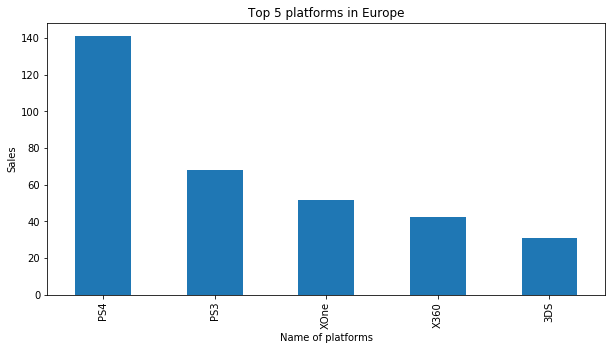

In [67]:
top5_eu_plat.plot(kind="bar", figsize=(10,5))
plt.title('Top 5 platforms in Europe')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

In top5_eu_plat variable we saved top 5 platforms in Europe. Thre are PS4, PS3, XBox One, XBox 360, and 3DS. We also used the method groupby and iloc[].

In [68]:
top5_jp_plat = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_jp_plat

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

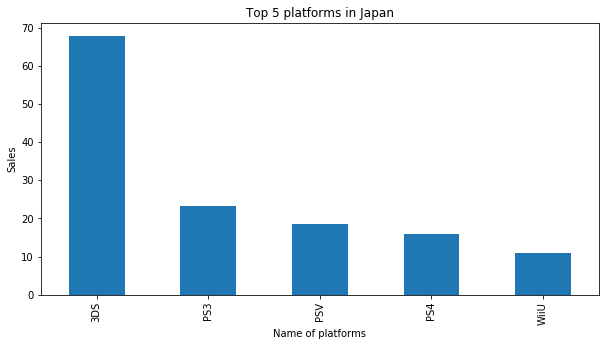

In [69]:
top5_jp_plat.plot(kind="bar", figsize=(10,5))
plt.title('Top 5 platforms in Japan')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

Japan markt differs from another regions, here are popular PS3, PSV and PS4 and WiiU, but the most popular platform is 3DS. 

In [70]:
top5_other_plat = games.groupby('platform')['other_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_other_plat

platform
PS4     48.35
PS3     26.77
XOne    14.27
X360    12.11
3DS      6.28
Name: other_sales, dtype: float64

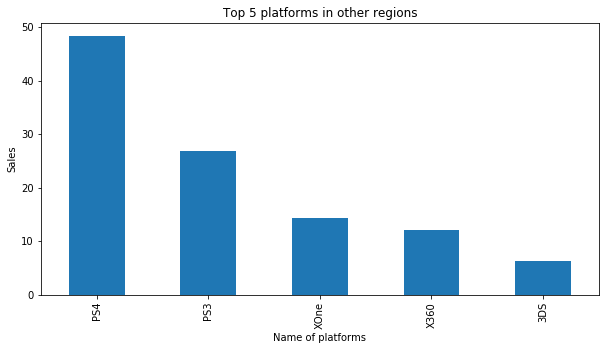

In [71]:
top5_other_plat.plot(kind="bar", figsize=(10,5))
plt.title('Top 5 platforms in other regions')
plt.xlabel('Name of platforms')
plt.ylabel('Sales')
plt.show()

For other regions more usable PS4, PS3, XBox One, XBox 360 and 3DS platforms. 

In [72]:
all_reg_sales = games.groupby('platform')[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum()
all_reg_sales

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,38.20,30.96,67.81,6.28
DS,0.57,0.85,0.00,0.12
PC,11.11,25.36,0.00,2.96
PS3,63.50,67.81,23.35,26.77
PS4,108.74,141.09,15.96,48.35
PSP,0.00,0.17,3.29,0.04
PSV,5.04,6.10,18.59,3.26
Wii,6.56,5.93,0.05,1.12
WiiU,29.21,19.85,10.88,4.69


In [73]:
sales_diff_plat = all_reg_sales / all_reg_sales.sum()
sales_diff_plat

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,0.087272,0.078933,0.481674,0.052346
DS,0.001302,0.002167,0.000000,0.001000
PC,0.025382,0.064656,0.000000,0.024673
PS3,0.145073,0.172883,0.165862,0.223139
PS4,0.248429,0.359712,0.113368,0.403017
PSP,0.000000,0.000433,0.023370,0.000333
PSV,0.011514,0.015552,0.132050,0.027173
Wii,0.014987,0.015119,0.000355,0.009336
WiiU,0.066734,0.050608,0.077284,0.039093


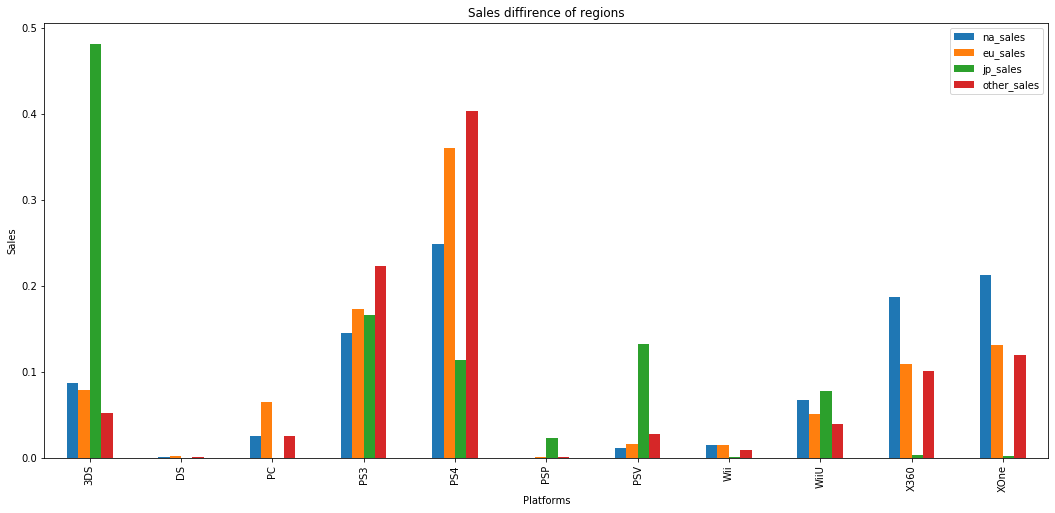

In [74]:
sales_diff_plat.plot(kind='bar', figsize=(18,8))
plt.title('Sales diffirence of regions')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

As we can see from the graph PS4 is more popular platform in Europe and in other regions. Japan has a different market from all other regions. 3DS is very popular in Japan compared with another regions. PS3 platform is in preferences by users in all regions. XBox One have also popularity in all regions, but not in Japan has quit the same popularity, less in Japan.

- **The top five genres in each region.** <a name="top5_genre"></a>

In [75]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [76]:
top5_na_genre = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_na_genre

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

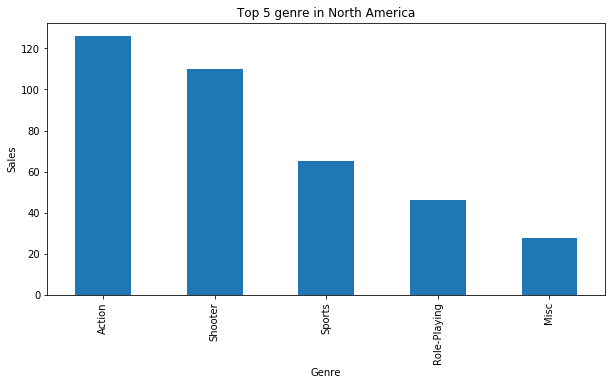

In [77]:
top5_na_genre.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 genre in North America')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

There are 5 top genres in North America: Action, Shooter, Sports, Role-Playing and Misc. We grouped the data by genres and loced 5 top genres. 

In [78]:
top5_eu_genre = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_eu_genre

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

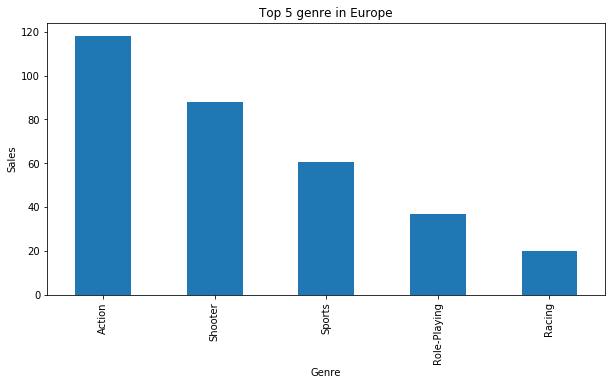

In [79]:
top5_eu_genre.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 genre in Europe')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

Also In Europe there is the same range of top 5, except the last one. Here it's Racing. 

In [80]:
top5_jp_genre = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_jp_genre

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

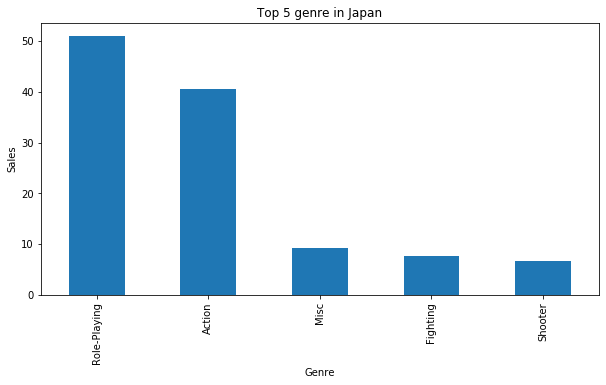

In [81]:
top5_jp_genre.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 genre in Japan')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

In Japan users prefer Role-Playing and Action genres.

In [82]:
top5_other_genre = games.groupby('genre')['other_sales'].sum().sort_values(ascending=False).iloc[:5]
top5_other_genre

genre
Action          37.20
Shooter         28.77
Sports          19.45
Role-Playing    11.48
Misc             6.09
Name: other_sales, dtype: float64

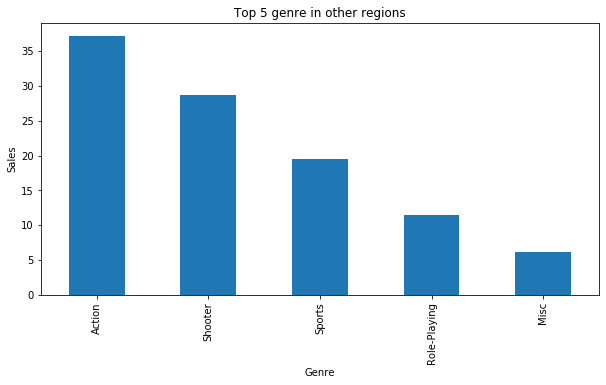

In [83]:
top5_other_genre.plot(kind='bar', figsize=(10,5))
plt.title('Top 5 genre in other regions')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

In other regions still Action is most popular genre, then are Shooter, Sports, Role-Playing and Misc genres. 

In [84]:
all_genre_sales = games.groupby('genre')[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum()
all_genre_sales

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,126.05,118.13,40.49,37.20
Adventure,7.14,8.25,5.82,2.43
Fighting,15.55,8.55,7.65,3.56
Misc,27.49,20.04,9.20,6.09
Platform,18.14,15.58,4.79,4.12
Puzzle,0.83,1.00,1.18,0.16
Racing,12.96,20.19,2.30,4.44
Role-Playing,46.40,36.97,51.04,11.48
Shooter,109.74,87.86,6.61,28.77


In [85]:
sales_diff_genre = all_genre_sales / all_genre_sales.sum()
sales_diff_genre

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,0.287976,0.301175,0.287612,0.310078
Adventure,0.016312,0.021034,0.041341,0.020255
Fighting,0.035526,0.021798,0.054340,0.029674
Misc,0.062804,0.051092,0.065350,0.050763
Platform,0.041443,0.039722,0.034025,0.034342
Puzzle,0.001896,0.002550,0.008382,0.001334
Racing,0.029609,0.051475,0.016338,0.037009
Role-Playing,0.106006,0.094256,0.362551,0.095691
Shooter,0.250714,0.224001,0.046953,0.239810


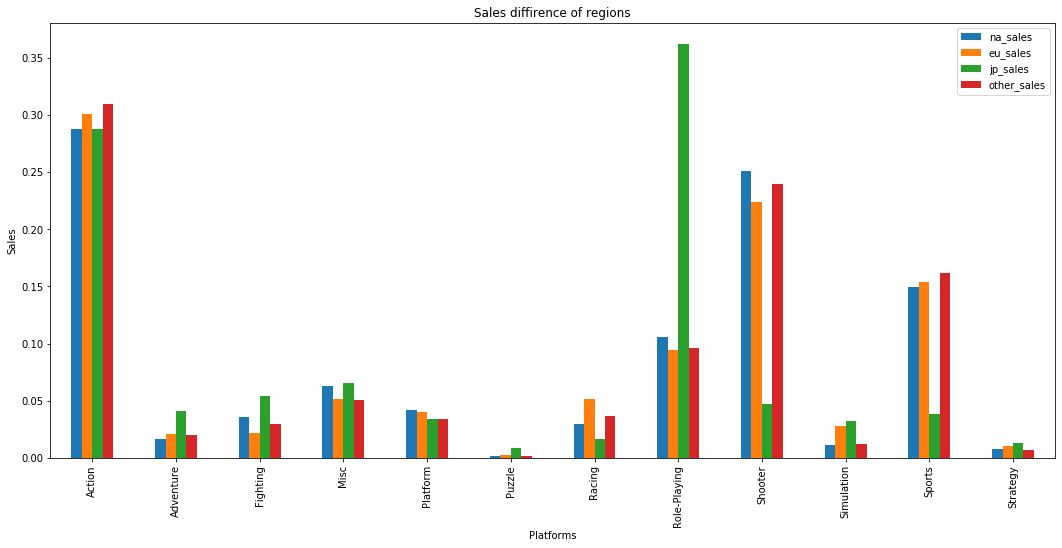

In [86]:
sales_diff_genre.plot(kind='bar', figsize=(18,8))
plt.title('Sales diffirence of regions')
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.show()

From the bar graph we see that Action genre is the most profitable genre in all regions. Role-Playing is very popular genre in Japan. Shooter and Sports genres are popular in each region but not in Japan. 

- **Do ESRB ratings affect sales in individual regions?** <a name="esrb"></a>

In [87]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [88]:
games['rating'].unique()

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

In [89]:
rating_dict = {'RP': 'Rating Pending', 
               'AO': 'Adults Only',
               'EC': 'Early Childhood', 
               'E10+': 'Everyone 10+', 
               'T': 'Teen', 
               'M': 'Mature 17+',
               'E': 'Everyone'
              } 
rating_dict
games['rating'].replace(rating_dict, inplace=True)
games['rating'].unique()

array(['Mature 17+', nan, 'Everyone', 'Teen', 'Everyone 10+'],
      dtype=object)

We created new dictionary for ESRB rating to understand what do those abbreviatures mean and replaced it to rating column. 

In [90]:
na_rating = games.groupby('rating')['na_sales'].sum().sort_values()
na_rating

rating
Teen             49.79
Everyone 10+     54.24
Everyone         79.05
Mature 17+      165.21
Name: na_sales, dtype: float64

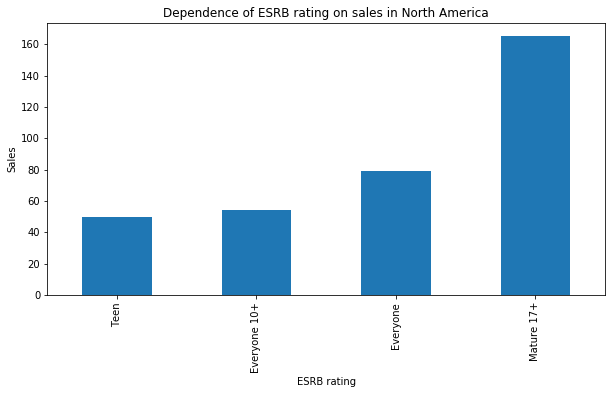

In [91]:
na_rating.plot(kind='bar', figsize=(10,5))
plt.title('Dependence of ESRB rating on sales in North America')
plt.xlabel('ESRB rating')
plt.ylabel('Sales')
plt.show()

In North America are many games suitable to mature player (17+). Next go everyone, everyone 10+ and teen. We can assume that in North America a lot of games lovers are older than 17.

In [92]:
eu_rating = games.groupby('rating')['eu_sales'].sum().sort_values()
eu_rating

rating
Teen             41.95
Everyone 10+     42.69
Everyone         83.36
Mature 17+      145.32
Name: eu_sales, dtype: float64

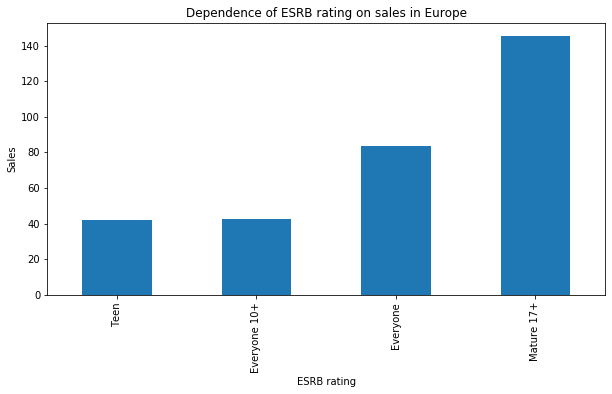

In [93]:
eu_rating.plot(kind='bar', figsize=(10,5))
plt.title('Dependence of ESRB rating on sales in Europe')
plt.xlabel('ESRB rating')
plt.ylabel('Sales')
plt.show()

The picture looks like in North America. Also in Europe also profitable game for 'mature' players. 

In [94]:
jp_rating = games.groupby('rating')['jp_sales'].sum().sort_values()
jp_rating

rating
Everyone 10+     5.89
Mature 17+      14.11
Everyone        15.14
Teen            20.59
Name: jp_sales, dtype: float64

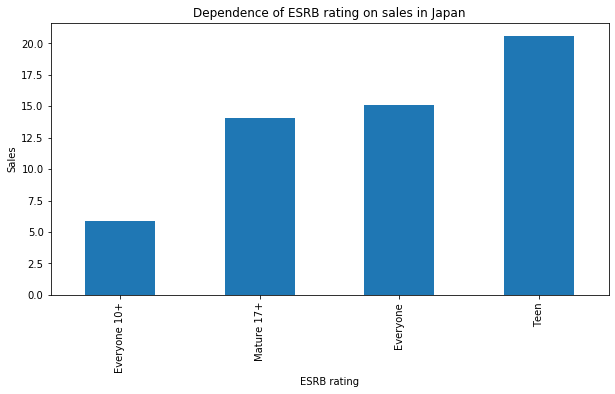

In [95]:
jp_rating.plot(kind='bar', figsize=(10,5))
plt.title('Dependence of ESRB rating on sales in Japan')
plt.xlabel('ESRB rating')
plt.ylabel('Sales')
plt.show()

The situtation in Japan looks out some different. Games for teens are more profitable, on the second place stands 'everyone', on the third 'mature' and on the last 'everyone 10+'.

In [96]:
other_rating = games.groupby('rating')['other_sales'].sum().sort_values()
other_rating

rating
Everyone 10+    12.57
Teen            14.29
Everyone        22.61
Mature 17+      47.04
Name: other_sales, dtype: float64

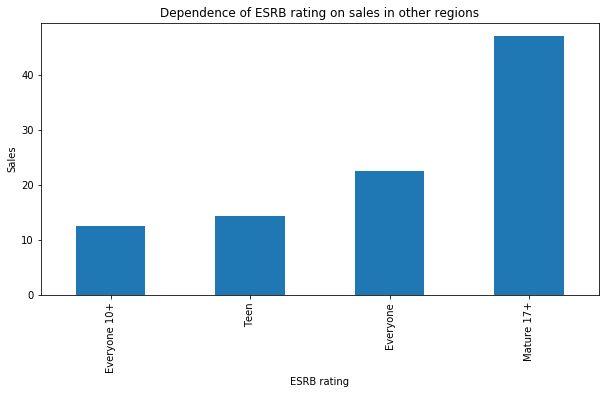

In [97]:
other_rating.plot(kind='bar', figsize=(10,5))
plt.title('Dependence of ESRB rating on sales in other regions')
plt.xlabel('ESRB rating')
plt.ylabel('Sales')
plt.show()

For other regions we see the same picture like in North America and Europe.

**Conclusion** <a name="con4"></a>

In this chapter we determinded top 5 platforms and top 5 genres for each region by using groupby() method. We've ploted the graphs and explained the distributions. In order to see which ESRB rating is profitable, we also grouped our data by sales. 

### Step 5. Testing the hypotheses <a name="step5"></a>

In [98]:
from scipy.stats import levene

- **Average user ratings of the Xbox One and PC platforms are the same.** <a name="hyp1"></a>

In [99]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,Mature 17+,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,Mature 17+,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,Mature 17+,12.62


In this step we have to test:

H₀ "The average user rating of the Xbox One platform == (is equal) the avarage user rating of the PC platform."
The alternative hypothesis, H₁, is based on H₀.

H₁ would be, "The average user rating of the Xbox One platform <> (differs) from the avarage user rating of the PC platform."

For testing null hypothesis we have to call st.ttest_ind() method from scipy library and to take a sample of the Xbox and PC platforms with help of .loc method. And we'll choose 0.05 critical statistical significance level. 

As the result if p-value will be less than statistical significance level we'll reject the null hypothesis. Another way we can't reject the null hypothesis.

In [100]:
stat, p = levene(games.loc[games['platform'] == 'XOne', "user_score"].dropna(), 
                 games.loc[games['platform'] == 'PC', "user_score"].dropna())
p

0.003897553110130418

In [101]:
print(games.loc[games['platform'] == 'XOne', "user_score"].dropna().agg(np.var))
print(games.loc[games['platform'] == 'PC', "user_score"].dropna().agg(np.var))

1.9069968429360695
3.035892752408882


The big p-value suggests that the populations do not have equal variances. By ttest_ind we have to concretize equal_var=False

In [102]:
alpha = .05
results = st.ttest_ind(games.loc[games['platform'] == 'XOne', "user_score"].dropna(), 
                       games.loc[games['platform'] == 'PC', "user_score"].dropna(),
                       equal_var=False)
print(results)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis") 
else:
    print("We can't reject the null hypothesis") 

Ttest_indResult(statistic=1.45192815744488, pvalue=0.14759594013430463)
p-value: 0.14759594013430463
We can't reject the null hypothesis


From our results we can conclude that our p-value is big (14%) and because of this we can't reject our null hypothesis. It means that we have small probability of getting a difference between rating of two platforms. It means that the avarage user rating of the Xbox and PC platforms is equal. 

- **Average user ratings for the Action and Sports genres are different.** <a name="hyp2"></a>

In this step we have to test:

H₀ "The average user rating for the Action genre == (is equal) the avarage user rating for the Sports genre." The alternative hypothesis, H₁, is based on H₀.

H₁ would be, "The average user rating for the Action genre <> (differs) from the avarage user rating for the Sports genre."

For testing null hypothesis we have to call st.ttest_ind() method from scipy library and to take a sample of the Xbox and PC platforms with help of .loc method. And we'll choose 0.05 critical statistical significance level.

As the result if p-value will be less than statistical significance level we'll reject the null hypothesis. Another way we can't reject the null hypothesis.

In [103]:
stat, p = levene(games.loc[games['genre'] == 'Action', "user_score"].dropna(), 
                 games.loc[games['genre'] == 'Sports', "user_score"].dropna())
p

4.2566688218274047e-07

In [104]:
print(games.loc[games['genre'] == 'Action', "user_score"].dropna().agg(np.var))
print(games.loc[games['genre'] == 'Sports', "user_score"].dropna().agg(np.var))

1.7693609042482705
3.180612814465409


The small p-value suggests that the populations do not have equal variances. By equal_var parameter we set False.

In [105]:
alpha = .05
results = st.ttest_ind(games.loc[games['genre'] == 'Action', "user_score"].dropna(), 
                       games.loc[games['genre'] == 'Sports', "user_score"].dropna(),
                       equal_var=False)
print(results)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis") 
else:
    print("We can't reject the null hypothesis") 

Ttest_indResult(statistic=10.233428417448625, pvalue=1.4460039700704315e-20)
p-value: 1.4460039700704315e-20
We reject the null hypothesis


From our second test of another hypothesis we see that we reject the null hypothesis. Our p-value is smaller than statistical significance level. From this we can conclude that the avarege rating for the Action and Sports genres are different. There is not probability to get equalness.

**Conclusion** <a name="con5"></a>

Our last step in this project was to test two hypotesis. For this we called 'scipy' library. We explored the variences with Levene's test. For testing hypothesises we used st.ttest_ind() method to getting know p-value and choosed alpha 0.05 as a critical statistical significance level.

### Overall Conclusion <a name="overall"></a>

We made a big work with a big data. First of all we read the data, looked over all information with methods: info(), head() and describe. We tidyed up our raw data, made all names of columns lower case. We found and got rid of missing with dropna() and unknown values like 'tbd' with replace() method. We changen the year column to interger data type and user score to floating type. Also we created new column of total sales summed all sales in different regions.

The next step we started with analysing our data. We looked at how many games were released in different years. In year 1980 began to release the games and we concluded that in 2008 and 2009 years were released a lot of games. From 2013 the number of released games decreased a lot. We found platforms with the greatest total sales. Those are 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'. These platforms brought a lot of earnings for online store Ice. We saved them in top_6 variable and builded the graphs based on data for each year. We determinded that it took around 11 years for new platforms to appear and old ones to fade. We took the period from 2013 to make our further analysis more precise. We concluded that PS4 platform is leading in sales. The last years all platforms were shrinking, beacuse it wasn't produced a lot of good games. We selected the PS4 as potentially profitable platforms, because we seen that it was many sales of the games of this platform, but also the games on PS3, XBox One, 3DS and XBox 360 platforms are very popular. We can make a conclusion that the store have to upload more new games and make good advertising for top 6 platforms that would popular for all regions to interest gamers and to increase sales.

Next we ploted box plots for the global sales of all games, broken down by platform. We noticed that it was the differences in sales of each platform. We ploted the graphs of distribution how user and professional reviews affect sales for PS4 platform. We builded a scatter plot and calculated the correlation between reviews and sales. We deceided that critic score impact on sales of the games. The higher the critic's score, the higher the demand for the game. So, the store have to post more critic scores on the site to show gamers the best new games. Also the user score impact on sales, but not so strong. By comparing the sales of the same games on other platforms including on PS4 we determined some popular games like "FIFA 14" and "FIFA 15" on platforms like PS3, XBox 360 and PS4. What we have found is that people like Wii platfrom. There are a lot of kinds of genres, but the most profitable genres are Action, Sports and Shooter. So it'll be good idea to produce and to promote more cools games in these genres. We took a look at the general distribution of games by genre. 

The next step was to create a user profile for each region. We determined for each region (North America, Europe, Japan and other) the top five platforms and described the variations in their market shares from region to region. Also we have determined the top five genres in each region. We can conclude that Japan market very differs from another regions and the store have to pay close attention for planning an advertising campaign for this region. The last time they were very intrested on 3DS platforms and Role-Playing genre. Gamers in North America more intrested in PS4 and XBox platforms. In Europe the most popular platform is PS4 too. All regions are intrested in Action genre. Also Shooters and Sports generes are popular except Japan. For ESRB ratings the picture is almost the same in all regions, most off the games are mature oriented (17+). Pay attantion that in Japan more profitable games for teens.

The last step was to test two hypotheses. We had to test if the average user ratings of the Xbox One and PC platforms are the same and if the average user ratings for the Action and Sports genres are different. By using scipy library we run the Levene's test to know if variances of the samples are equal or not, called ttest_ind with 0.05 critical statistical significance level and tooked the samples from our data. So we can conclude that the average user ratings of Xbox One and the average user ratings of PC platforms are equal. From our second test of another hypothesis we can conclude that the avarege rating for the Action and Sports genres are different. There is not probability to get equalness.

So we can draw conclusions that online store Ice have to post more critic score for games on the site, because there is a positive correlation between critic score and total sales. Users should see and know which games are the most popular and have good ratings according to critics. As we sad before there are top platforms in all regions: PS series XBox series (also 3DS in Japan). Action genre is the most profitable genre in all regions. Role-Playing is very popular genre in Japan. Shooter and Sports genres are popular in each region but not in Japan. On these platfoms and genres need to be focused by plannig the adversting campaign for 2017 to increase sales.